<a href="https://colab.research.google.com/github/lebe1/ClimateChangeAI/blob/main/Data-Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import random
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

Create random seed given by number 100

In [2]:
random.seed(100)
print(random.random())

0.1456692551041303


In [3]:
# Check how many files are stored in the directory
paths = "/home/funny/Documents/Uni/Climate_Change_AI/Project 2/Dataset/A_basins_total_upstrm/2_timeseries/daily"

# Get all the files in the directory
files = os.listdir(paths)

# Check length of files
print(len(files)) # 860

random_list = random.sample(files, 100)

# Check output of random_list
print(random_list)

# Check if the list is unique
print(len(random_list) == len(set(random_list)))

# Check if list has length 100
print(len(random_list) == 100)

860
['ID_577.csv', 'ID_158.csv', 'ID_45.csv', 'ID_101.csv', 'ID_545.csv', 'ID_783.csv', 'ID_240.csv', 'ID_283.csv', 'ID_784.csv', 'ID_364.csv', 'ID_150.csv', 'ID_576.csv', 'ID_377.csv', 'ID_629.csv', 'ID_739.csv', 'ID_801.csv', 'ID_134.csv', 'ID_823.csv', 'ID_203.csv', 'ID_446.csv', 'ID_60.csv', 'ID_795.csv', 'ID_278.csv', 'ID_680.csv', 'ID_183.csv', 'ID_769.csv', 'ID_831.csv', 'ID_64.csv', 'ID_669.csv', 'ID_33.csv', 'ID_127.csv', 'ID_711.csv', 'ID_181.csv', 'ID_63.csv', 'ID_124.csv', 'ID_259.csv', 'ID_656.csv', 'ID_785.csv', 'ID_541.csv', 'ID_593.csv', 'ID_59.csv', 'ID_657.csv', 'ID_17.csv', 'ID_248.csv', 'ID_141.csv', 'ID_744.csv', 'ID_344.csv', 'ID_11.csv', 'ID_703.csv', 'ID_828.csv', 'ID_199.csv', 'ID_758.csv', 'ID_255.csv', 'ID_793.csv', 'ID_118.csv', 'ID_543.csv', 'ID_19.csv', 'ID_659.csv', 'ID_645.csv', 'ID_760.csv', 'ID_867.csv', 'ID_313.csv', 'ID_549.csv', 'ID_114.csv', 'ID_105.csv', 'ID_714.csv', 'ID_658.csv', 'ID_319.csv', 'ID_568.csv', 'ID_474.csv', 'ID_122.csv', 'ID_842.cs

In [4]:
# Load the data from the 100 random generated IDs

# Create a list of the paths to the files
paths = "~/Documents/Uni/Climate_Change_AI/Project 2/Dataset/A_basins_total_upstrm/2_timeseries/daily/"
df_list = []
for file_name in random_list:
    paths += file_name
    df = pd.read_csv(paths, sep=";")
    df_list.append(df)
    paths = "~/Documents/Uni/Climate_Change_AI/Project 2/Dataset/A_basins_total_upstrm/2_timeseries/daily/"

pd.set_option('display.max_colwidth', 2000)
df_list[0].head()


,YYYY,MM,DD,DOY,2m_temp_max,2m_temp_mean,2m_temp_min,2m_dp_temp_max,2m_dp_temp_mean,2m_dp_temp_min,...,swe,surf_net_solar_rad_max,surf_net_solar_rad_mean,surf_net_therm_rad_max,surf_net_therm_rad_mean,surf_press,total_et,prec,volsw_123,volsw_4
0,1981,1,1,1,-3.2,-8.1,-12.8,-7.4,-11.4,-15.0,...,135.35,139,32,74,40,84110,0.13,1.73,0.31,0.37
1,1981,1,2,2,-5.8,-9.0,-11.9,-9.6,-12.4,-14.8,...,138.90,146,31,55,42,84140,0.12,3.77,0.31,0.37
2,1981,1,3,3,-2.9,-6.0,-10.0,-5.2,-7.9,-12.3,...,142.44,176,35,70,24,83358,-0.06,3.58,0.31,0.37
3,1981,1,4,4,-2.0,-5.5,-9.2,-4.8,-7.5,-11.3,...,145.10,134,27,67,38,82805,0.03,2.58,0.31,0.37
4,1981,1,5,5,-8.1,-10.4,-12.8,-12.0,-15.2,-17.5,...,148.94,134,28,76,50,83126,0.37,5.45,0.31,0.37


Dataset directory has 882 files. Therefore, create 100 random numbers between 1 and 882 

In [5]:
# Check that df_list has length 100
print(len(df_list) == 100)

# Check that all the dataframes have the same length as the first dataframe
for df in df_list:
    if (len(df) == len(df_list[0])):
       continue
    else:
        print("Dataframes do not have the same length")

# Check that all the dataframes have the same columns as the first dataframe
for df in df_list:
    if (df.columns == df_list[0].columns).all():
        continue
    else:
        print("Dataframes do not have the same columns")

True


# Step 2 - Null Value Analysis  

In [6]:
# Check for null values
for df in df_list:
    if df.isnull().values.any():
        print("There are null values in the dataframe")
    else:
        continue

# Check for values of -999
for df in df_list:
    if (df == -999).values.any():
        print("There are values of -999 in the dataframe")
    else:
        continue

### Reflection

There could be no null values or any value of -999 obtained.

Column 'swe' has a lot of 0's, which makes sense and is not any NA since swe stands for 'Water equivalent of snow' and fitting to the summer month where usually no snow is occurring each column contains a lot of 0.

# Step 3 - Statistical Analysis

## Basic Data Analysis

### 1. Summary statistics  
Calculates descriptive statistics for numerical columns like mean, median, standard deviation, min, max, etc.

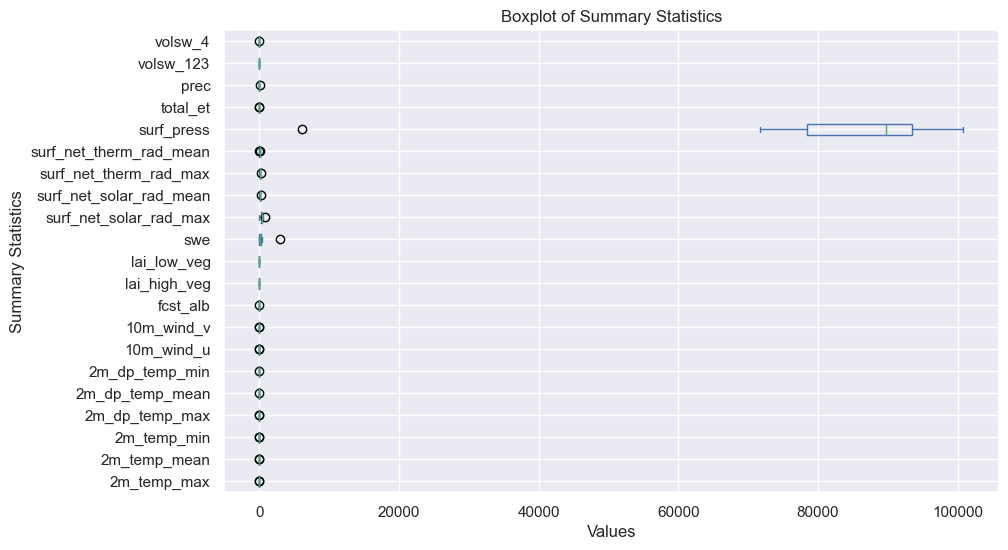

In [17]:
# Concat all df into one df
df = pd.concat(df_list)

# Describe the data to get summary statistics without the first four columns
numerical_columns = df.columns[4:]

# Calculate summary statistics
summary_stats = df[numerical_columns].describe()

# Remove the count row
summary_stats = summary_stats.drop('count', axis=0)

ax = summary_stats.plot(kind='box', vert=False, figsize=(10, 6))
#ax.set_xscale('log')
plt.title('Boxplot of Summary Statistics')
plt.xlabel('Values')
plt.ylabel('Summary Statistics')
plt.grid(True)
plt.show()

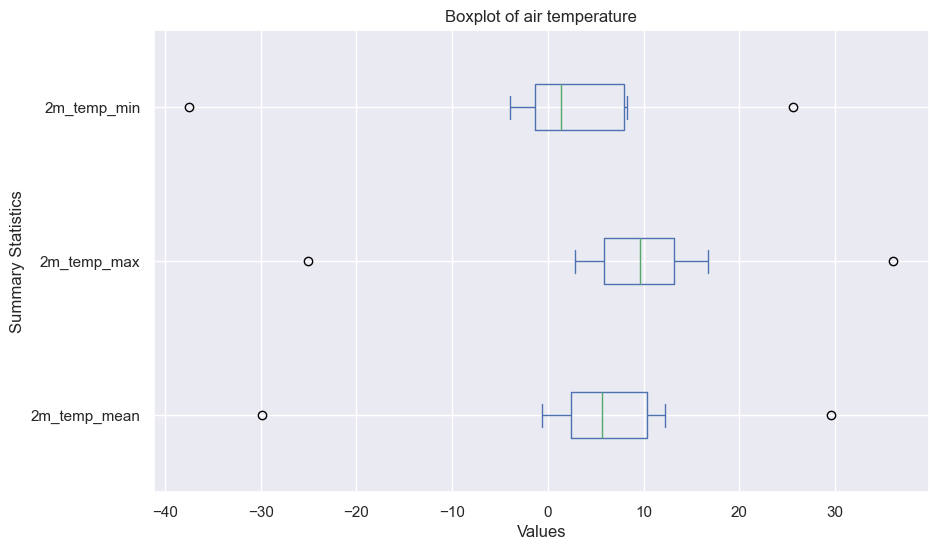

In [28]:
# Describe the data to get summary statistics without the first four columns
numerical_columns = ["2m_temp_mean", "2m_temp_max", "2m_temp_min"]

# Calculate summary statistics
summary_stats = df[numerical_columns].describe()

# Remove the count row
summary_stats = summary_stats.drop('count', axis=0)

ax = summary_stats.plot(kind='box', vert=False, figsize=(10, 6))
#ax.set_xscale('log')
plt.title('Boxplot of air temperature')
plt.xlabel('Values')
plt.ylabel('Summary Statistics')
plt.grid(True)
plt.show()

Text(0, 0.5, 'Summary Statistics')

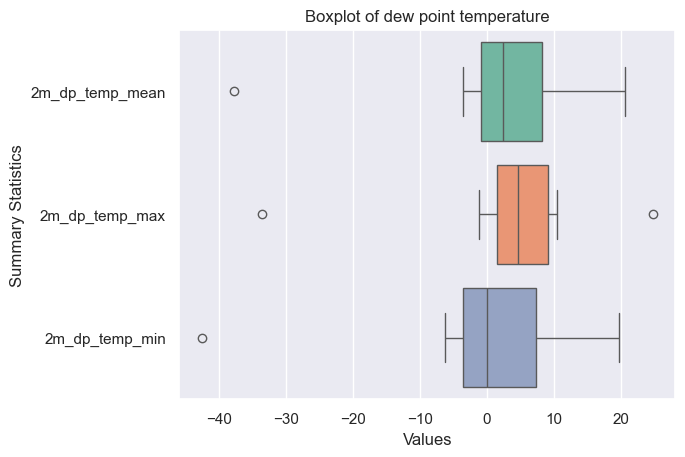

In [16]:
# Describe the data to get summary statistics without the first four columns
numerical_columns = ["2m_dp_temp_mean", "2m_dp_temp_max", "2m_dp_temp_min"]

# Calculate summary statistics
summary_stats = df[numerical_columns].describe()

# Remove the count row
summary_stats = summary_stats.drop('count', axis=0)

# Boxplot via seaborn
sns.boxplot(data=summary_stats, orient="h", palette="Set2")


# ax = summary_stats.plot(kind='box', vert=False, figsize=(10, 6))
# #ax.set_xscale('log')
plt.title('Boxplot of dew point temperature')
plt.xlabel('Values')
plt.ylabel('Summary Statistics')
# plt.grid(True)
# plt.show()

TODO: Continue with all the other values

<Axes: >

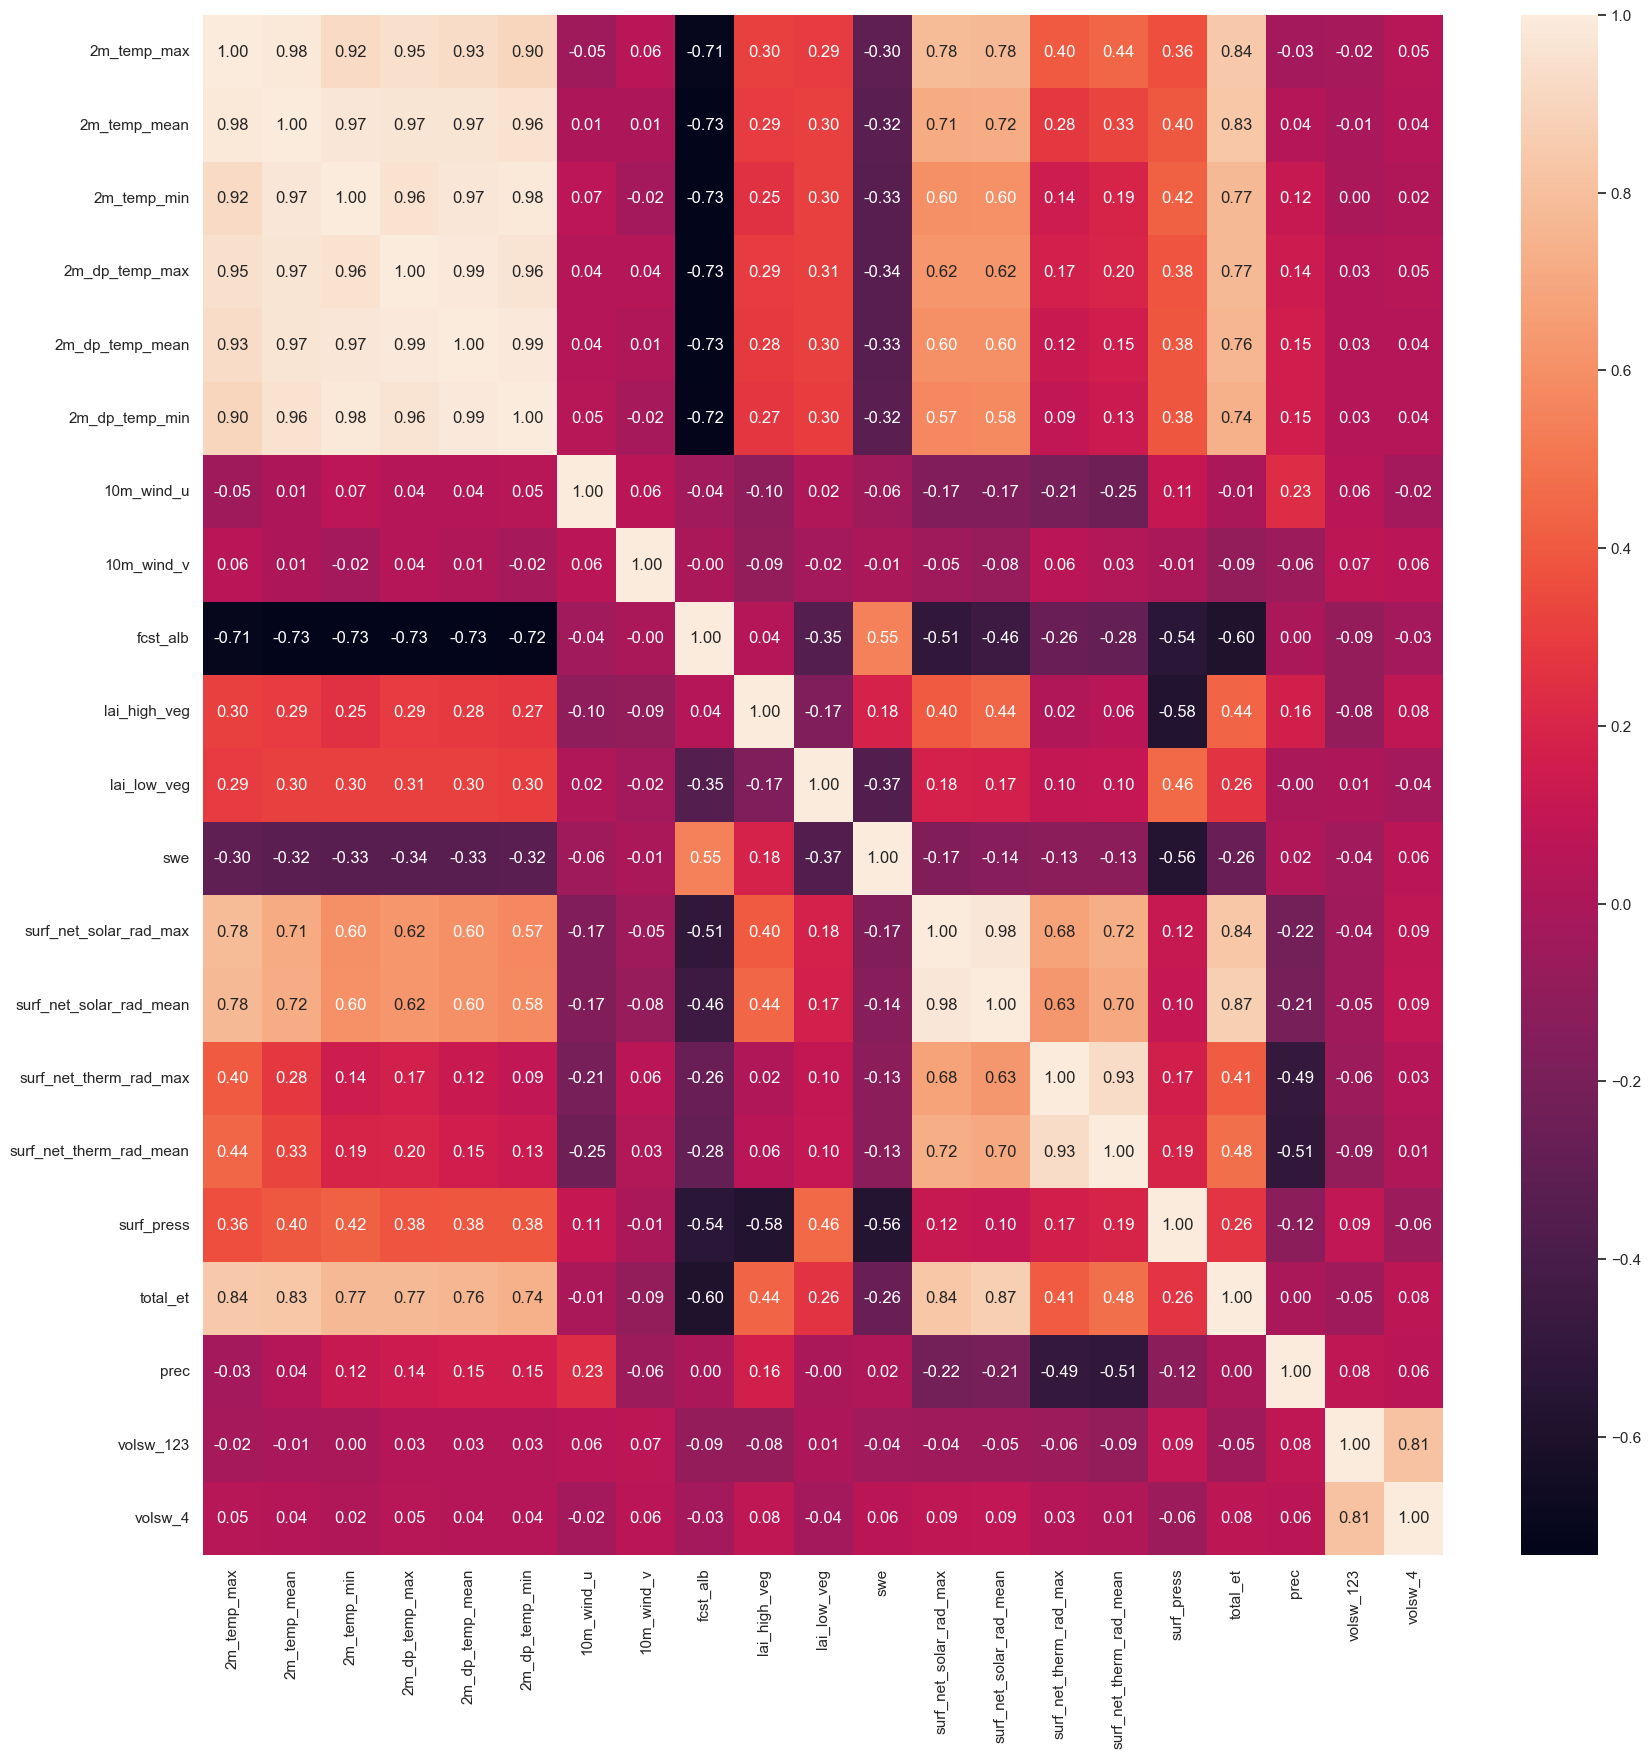

In [9]:
# Get all columns except the first four
numerical_columns = df.columns[4:]

# Calculate correlation matrix via seaborn
sns.set_theme()
plt.figure(figsize=(20, 20))

# Plot the correlation matrix
sns.heatmap(df[numerical_columns].corr(), annot=True, fmt=".2f")

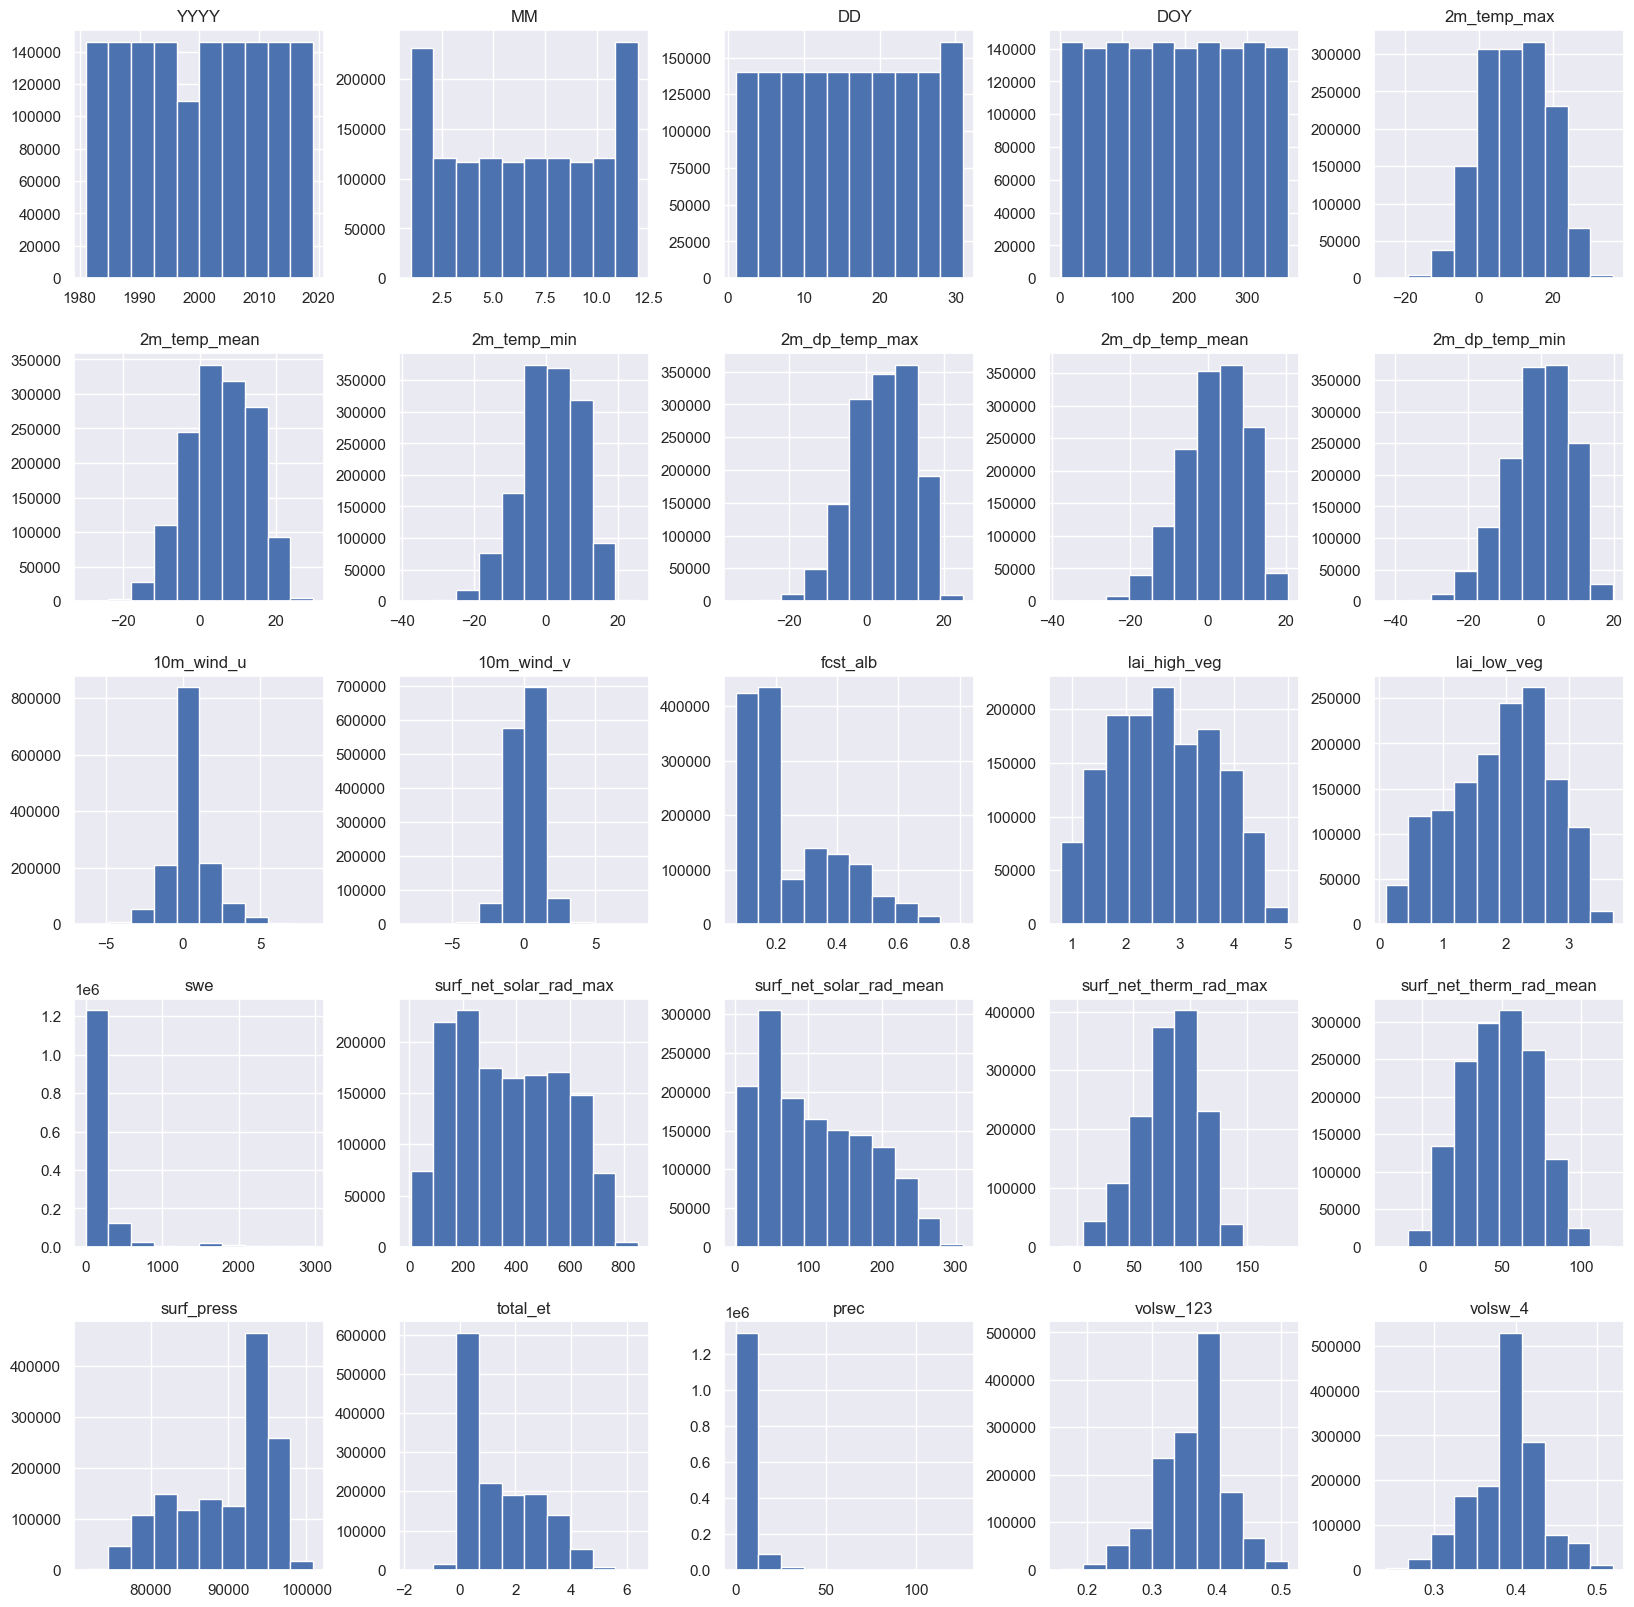

In [10]:
# Plot histogram of the data
df.hist(figsize=(20, 20))
plt.show()

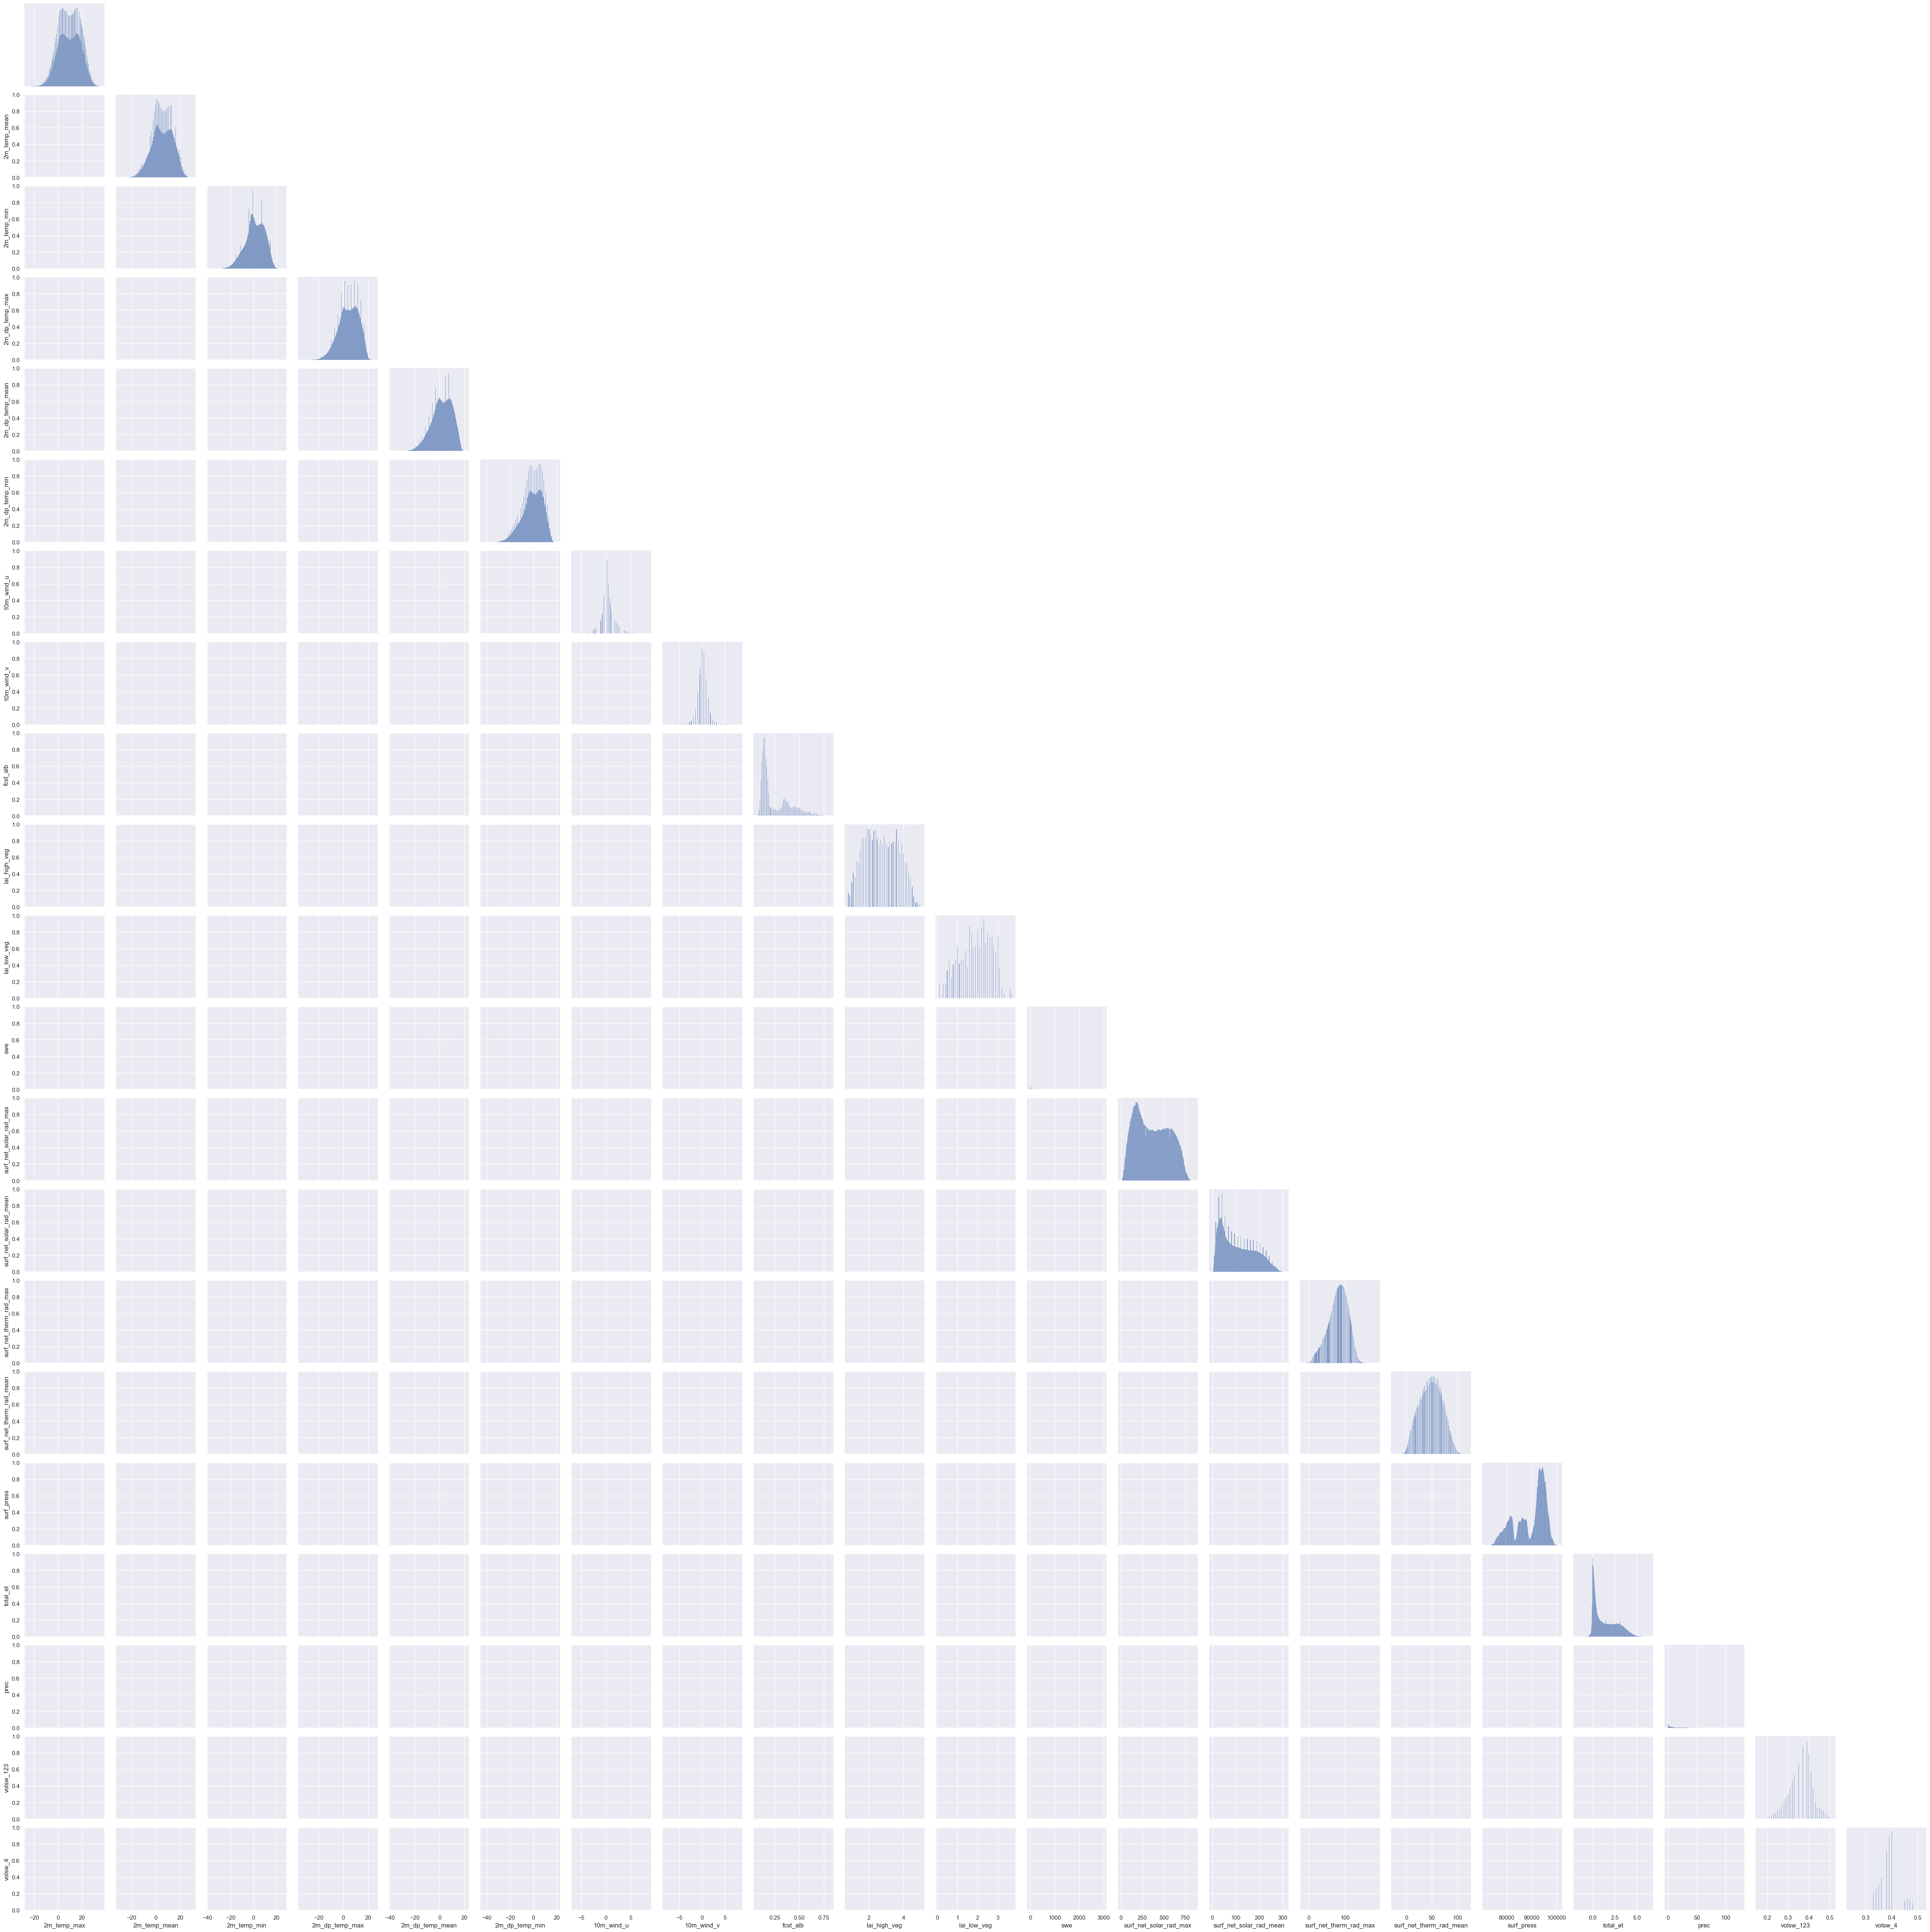

In [11]:
# Plot scatter matrix of the data with seaborn
sns.PairGrid(df[numerical_columns], diag_sharey=False, corner=True).map_upper(sns.scatterplot).map_diag(sns.histplot)

## TODO: Fix Scatterplot or remove it

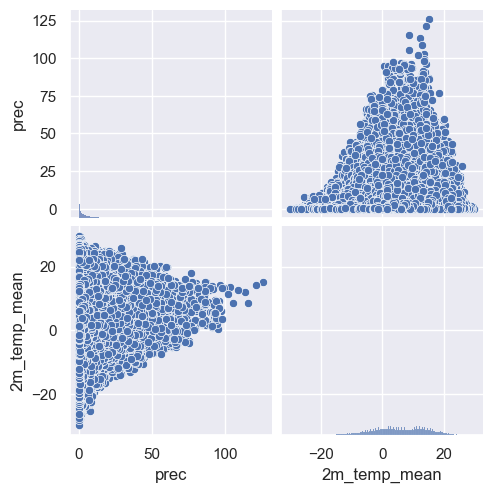

In [12]:
# Create dataframe consisting of only the precipitation column and 2m_temp_mean column
df_temp_prec = df[['prec', '2m_temp_mean']]

# Plot relationships between variables, like temperature against precipitation
sns.pairplot(df_temp_prec)

# Step 4 - Data Preprocessing
Impute missing values and transform/normalize any data, if needed

### Thoughts before action
1. No missing values found, therefore no imputation
2. First, we add the columns longitude, latitude and elevation from the table gauges_attributes.csv in folder 'D_gauges/1_attributes'
3. Next, we split the dataset into a training dataset 70% and a test dataset 30%
4. Found some unreasonable outliers, therefore will transform outliers to mean value of the last two days before but first will have a detailed look at each context
5. We found the column surf_press with very high values comparing to the other columns (mean of 90000 vs mean of 0) and the column swe (mean of 500 (?) vs mean of 0). Therefore, we normalize the whole dataset. 

### 2. step
Add columns longitude, latitude and elevation to main dataframe

In [39]:
paths_to_gauges = "~/Documents/Uni/Climate_Change_AI/Project 2/Dataset/D_gauges/1_attributes/Gauge_attributes.csv"
element_ids = [int(item.lstrip("ID_").rstrip(".csv")) for item in random_list]

# Add 0 to element_ids to get the header of the csv file
element_ids.append(0)

# Read the csv file
df_gauges = pd.read_csv(paths_to_gauges, sep=";", header=0, usecols=[0,5,6,7], skiprows=lambda x: x not in element_ids)

# Remove 0 from element_ids
element_ids.remove(0)

# Check for null values
if df_gauges.isnull().values.any():
    print("There are null values in the dataframe")

# Check for values of -999
if (df_gauges == -999).values.any():
    print("There are values of -999 in the dataframe")

df_gauges.head()

# Iterate over the element_ids and get the corresponding gauge attributes
for i in range(len(element_ids)):

    # Get the positional arguments
    positional_arguments = df_gauges.iloc[:, 1:][df_gauges["ID"] == element_ids[i]]

    df_item = df_list[i]
    df_item["elev"] = positional_arguments.iat[0, 0]
    df_item["lon"] = positional_arguments.iat[0, 1]
    df_item["lat"] = positional_arguments.iat[0, 2]
    df_list[i] = df_item

# Check if the positional arguments have been added to the dataframes
df_list[9].head()

,YYYY,MM,DD,DOY,2m_temp_max,2m_temp_mean,2m_temp_min,2m_dp_temp_max,2m_dp_temp_mean,2m_dp_temp_min,...,surf_net_therm_rad_max,surf_net_therm_rad_mean,surf_press,total_et,prec,volsw_123,volsw_4,elev,lon,lat
0,1981,1,1,1,5.3,2.5,-0.3,0.1,-3.1,-5.7,...,84,55,96664,0.80,0.73,0.39,0.35,155,4802286,2801832
1,1981,1,2,2,2.4,0.7,-1.1,-1.5,-4.0,-6.8,...,81,64,96776,0.68,1.63,0.39,0.35,155,4802286,2801832
2,1981,1,3,3,7.2,5.3,2.7,2.8,0.9,-1.0,...,60,37,95417,1.50,5.86,0.39,0.36,155,4802286,2801832
3,1981,1,4,4,5.0,3.3,0.6,2.8,-0.4,-2.0,...,91,70,95207,0.85,0.91,0.39,0.36,155,4802286,2801832
4,1981,1,5,5,0.2,-1.1,-3.1,-2.1,-5.6,-8.5,...,87,61,95735,0.54,2.83,0.39,0.36,155,4802286,2801832


### 3. Step 
Split the dataset into a training dataset 70% and a test dataset 30%

In [54]:
# Select 70% of the data for training
train, test = train_test_split(df_list, train_size=0.7, random_state=100)

# Check if the length of train and test is correct
print(len(train) == 70)
print(len(test) == 30)

# Concat all df into one df
df_train = pd.concat(train)
df_test = pd.concat(test)

True
True


In [27]:
def zscore(df):
    # Create new dataframe
    df_new = pd.DataFrame()

    # Calculate z-score for each column
    for i in df.columns:
        # Calculate mean and standard deviation
        mean = np.mean(df[i])
        std = np.std(df[i])

        # Calculate z-score
        df_new[i] = np.abs((df[i] - mean) / std)

    return df_new

df_zscore = zscore(df[numerical_columns])

df_zscore.head()

# Check if there are any outliers, meaning z-score >= 3 or z-score <= -3

outliers = df_zscore >= 3

# Print sum of outliers i.e. true values
print(outliers.sum())


2m_temp_max                  507
2m_temp_mean                1181
2m_temp_min                 3262
2m_dp_temp_max              3045
2m_dp_temp_mean             3744
2m_dp_temp_min              4596
10m_wind_u                 20445
10m_wind_v                 17073
fcst_alb                    5717
lai_high_veg                   0
lai_low_veg                    0
swe                        42732
surf_net_solar_rad_max         0
surf_net_solar_rad_mean        0
surf_net_therm_rad_max       446
surf_net_therm_rad_mean       34
surf_press                     0
total_et                     549
prec                       30377
volsw_123                   2803
volsw_4                     3424
dtype: int64


### 4. Add columns from gauges attribute
1. Check for null values or value of -999
2. If no null values, add values to dataframe

# Dataset analysis first overview

We have 25 columns per each csv file.\
860 csv files representing different locations \
**Question:** Is there a map where we can see where for example file ID_204.csv is located?

File numbers starting from 1 to 882 with the name of "ID_{number}.csv" like "ID_1.csv" but not all numbers are represented like 400. \
In total 22 file numbers are missing in between 1 and 882.\
**Question:** What are those 22 missing values exactly and why are they missing?

### Missing values understanding

In download page [zenodo.org](https://zenodo.org/records/5153305) there is a note that: "It is recommended to read the supplementary info file before using the dataset. For example, it clarifies the time conventions and that NAs are indicated by the number -999 in the runoff time series."\

On a first overview by choosing five random files no number of -999 could have been found.\

TODO: Check this on your code or understand why this step is not necessary i.e. why in our data sets there are NAs of -999.\

Further, reading from /info_deutsch/Zeitreihen.txt it says:
```quote
[...] Unit of runoff data is m3/s. Conversion to runoff heights can be performed using the catchment area provided (attribute “area_gov” in Appendix A of the accompanying paper). 
The units of the meteorological time series can be obtained from Appendix A of the accompanying paper[...].
The meteorological time series have no gaps.
``` 

